In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
df["wine"]=wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<AxesSubplot:>

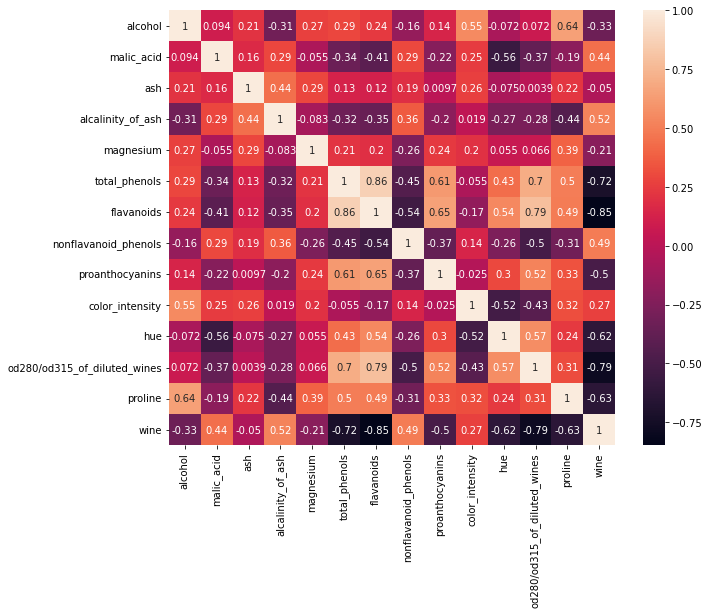

In [7]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(),annot=True)

In [8]:
col_scale=df.drop(['nonflavanoid_phenols','hue','wine'],axis=1)
col_scale.shape

(178, 11)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
col_scale.iloc[:]=scaler.fit_transform(col_scale.iloc[:])
col_scale.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,1.224884,0.251717,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.544721,-0.293321,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,2.135968,0.269020,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,1.032155,1.186068,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.401404,-0.319276,0.449601,-0.037874


In [11]:
df2=df[['nonflavanoid_phenols','hue']]
df2.head()

,nonflavanoid_phenols,hue
0,0.28,1.04
1,0.26,1.05
2,0.30,1.03
3,0.24,0.86
4,0.39,1.04


In [12]:
X=pd.concat([col_scale,df2],axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline,nonflavanoid_phenols,hue
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,1.224884,0.251717,1.847920,1.013009,0.28,1.04
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.544721,-0.293321,1.113449,0.965242,0.26,1.05
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,2.135968,0.269020,0.788587,1.395148,0.30,1.03
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,1.032155,1.186068,1.184071,2.334574,0.24,0.86
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.401404,-0.319276,0.449601,-0.037874,0.39,1.04


In [13]:
y=df['wine'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [16]:
pipeline=Pipeline([('pca',PCA(0.95)), ('svm',SVC())])

In [17]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)), ('svm', SVC())])

In [18]:
pipeline.score(X_test,y_test)

0.9444444444444444

In [19]:
y_predict=pipeline.predict(X_test)
y_predict

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2])

In [20]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,y_predict))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.85      1.00      0.92        11
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36

